<a href="https://colab.research.google.com/github/sanas2211/result-management-system/blob/main/Result_management_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add all the *libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, count, stddev
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Load Dataset

In [ ]:
file_name = "student_results_final.csv"
data = pd.read_csv(file_name)

Exploratory Data Analysis (EDA)

In [ ]:
print("First 5 Rows of Dataset:")
print(data.head())

First 5 Rows of Dataset:
  Student_ID  Age Department  Electronics  Programming  Database  \
0     S00001   19        CSE           87           46        78   
1     S00002   18        CSE           87           98        69   
2     S00003   22        CSE           98           42        95   
3     S00004   20        CSE           83           44        75   
4     S00005   21        CSE           34           70        45   

   Data Science  Mathematics  DSA  Gender  CGPA  
0            81           73   98    Male  5.16  
1            35           54   64    Male  8.76  
2            43           34   61  Female  7.86  
3            67           31   80    Male  8.11  
4            49           80   79  Female  9.49  


Data Loading

In [ ]:
print("Last 5 Rows of Dataset:")
print(data.tail())

Last 5 Rows of Dataset:
     Student_ID  Age Department  Electronics  Programming  Database  \
9995     S09996   21        CSE           88           46        63   
9996     S09997   24        CSE           61           54        49   
9997     S09998   22        CSE           73           70        35   
9998     S09999   24        CSE           57           99        46   
9999     S10000   20        CSE           34           67        34   

      Data Science  Mathematics  DSA  Gender  CGPA  
9995            77           64   44  Female  5.43  
9996            83           38   40  Female  7.04  
9997            36           61   39  Female  9.87  
9998            82           55   57  Female  9.92  
9999            38           98   37  Female  5.06  


Data Preprocessing



In [ ]:
print("Dataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student_ID    10000 non-null  object 
 1   Age           10000 non-null  int64  
 2   Department    10000 non-null  object 
 3   Electronics   10000 non-null  int64  
 4   Programming   10000 non-null  int64  
 5   Database      10000 non-null  int64  
 6   Data Science  10000 non-null  int64  
 7   Mathematics   10000 non-null  int64  
 8   DSA           10000 non-null  int64  
 9   Gender        10000 non-null  object 
 10  CGPA          10000 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 859.5+ KB
None


In [ ]:
print("Statistical Overview:")
print(data.describe())

Statistical Overview:
                Age   Electronics   Programming      Database  Data Science  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      20.992700     64.781100     64.696300     64.410700     64.820700   
std        2.003409     20.314513     20.198818     20.230733     20.029585   
min       18.000000     30.000000     30.000000     30.000000     30.000000   
25%       19.000000     47.000000     47.000000     47.000000     48.000000   
50%       21.000000     65.000000     65.000000     64.000000     65.000000   
75%       23.000000     82.000000     82.000000     82.000000     82.000000   
max       24.000000     99.000000     99.000000     99.000000     99.000000   

        Mathematics           DSA          CGPA  
count  10000.000000  10000.000000  10000.000000  
mean      65.045700     64.173400      7.513701  
std       20.070443     20.043795      1.444976  
min       30.000000     30.000000      5.000000  
25%       48.000

In [ ]:
print("Checking for Missing Values:")
print(data.isnull().sum())

Checking for Missing Values:
Student_ID      0
Age             0
Department      0
Electronics     0
Programming     0
Database        0
Data Science    0
Mathematics     0
DSA             0
Gender          0
CGPA            0
dtype: int64


Data Preprocessing

In [ ]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

 Convert Pandas DataFrame to Spark DataFrame for Big Data Processing

In [ ]:
spark = SparkSession.builder.appName("ResultManagementSystem").getOrCreate()
df_spark = spark.createDataFrame(data)

MapReduce

In [ ]:
average_marks = df_spark.select(*[avg(col(sub)).alias(f"Avg_{sub}") for sub in df.columns[3:-1]])
max_marks = df_spark.select(*[max(col(sub)).alias(f"Max_{sub}") for sub in df.columns[3:-1]])
min_marks = df_spark.select(*[min(col(sub)).alias(f"Min_{sub}") for sub in df.columns[3:-1]])
std_dev_marks = df_spark.select(*[stddev(col(sub)).alias(f"StdDev_{sub}") for sub in df.columns[3:-1]])


In [ ]:
total_students = df_spark.select(count("Student_ID").alias("Total_Students")).collect()[0]["Total_Students"]

In [ ]:
print("Average Marks per Subject:")
average_marks.show()

Average Marks per Subject:
+--------------+-----------------+---------------+---------------+------------+----------------+---------------+
|Avg_Department|         Avg_CGPA|Avg_Electronics|Avg_Programming|Avg_Database|Avg_Data Science|Avg_Mathematics|
+--------------+-----------------+---------------+---------------+------------+----------------+---------------+
|          NULL|7.513701000000004|        64.7811|        64.6963|     64.4107|         64.8207|        65.0457|
+--------------+-----------------+---------------+---------------+------------+----------------+---------------+



In [ ]:
print("Maximum Marks per Subject:")
max_marks.show()

Maximum Marks per Subject:
+--------------+--------+---------------+---------------+------------+----------------+---------------+
|Max_Department|Max_CGPA|Max_Electronics|Max_Programming|Max_Database|Max_Data Science|Max_Mathematics|
+--------------+--------+---------------+---------------+------------+----------------+---------------+
|           CSE|    10.0|             99|             99|          99|              99|             99|
+--------------+--------+---------------+---------------+------------+----------------+---------------+



In [ ]:
print("Minimum Marks per Subject:")
min_marks.show()

Minimum Marks per Subject:
+--------------+--------+---------------+---------------+------------+----------------+---------------+
|Min_Department|Min_CGPA|Min_Electronics|Min_Programming|Min_Database|Min_Data Science|Min_Mathematics|
+--------------+--------+---------------+---------------+------------+----------------+---------------+
|           CSE|     5.0|             30|             30|          30|              30|             30|
+--------------+--------+---------------+---------------+------------+----------------+---------------+



In [ ]:
print("Standard Deviation of Marks per Subject:")
std_dev_marks.show()

Standard Deviation of Marks per Subject:
+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+
|StdDev_Department|       StdDev_CGPA|StdDev_Electronics|StdDev_Programming|   StdDev_Database|StdDev_Data Science|StdDev_Mathematics|
+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+
|             NULL|1.4449762656320089|20.314513302933793|20.198818419317355|20.230732902328988| 20.029584866816236|20.070443288063625|
+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+



Visualization

In [ ]:
avg_marks_pd = average_marks.toPandas()
max_marks_pd = max_marks.toPandas()
min_marks_pd = min_marks.toPandas()
std_dev_pd = std_dev_marks.toPandas()

Data Visualization

Visualizations


<ipython-input-74-7962841482d6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




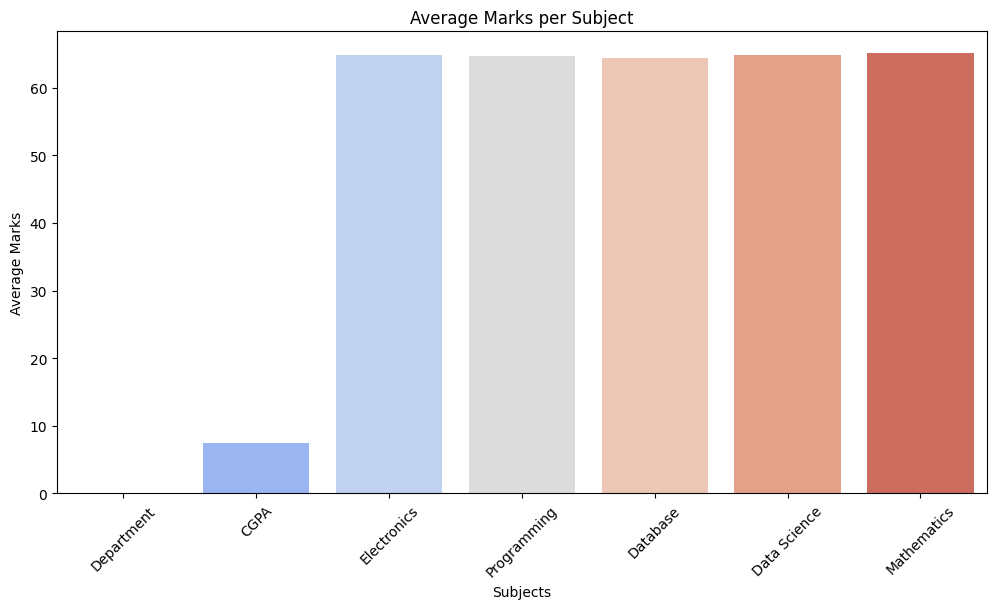

<ipython-input-74-7962841482d6>:11: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



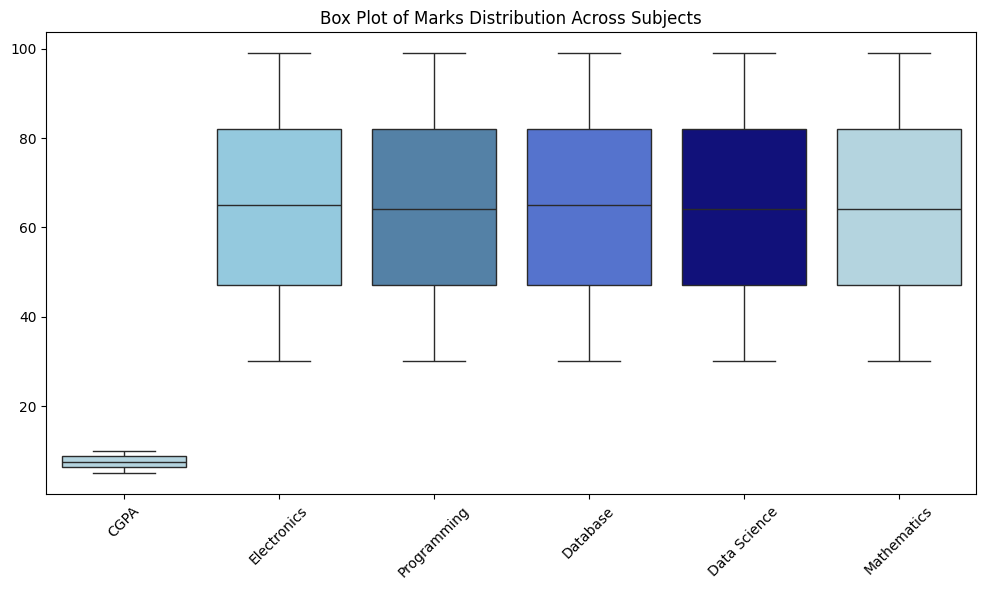

<ipython-input-74-7962841482d6>:17: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



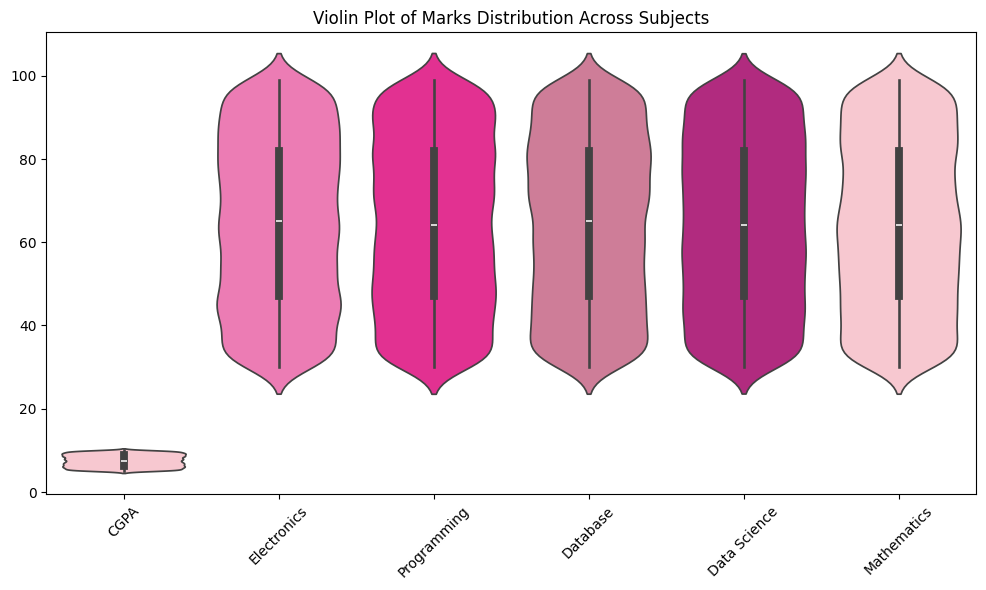

In [ ]:
print("Visualizations")
plt.figure(figsize=(12, 6))
sns.barplot(x=df.columns[3:-1], y=avg_marks_pd.iloc[0], palette="coolwarm")
plt.title("Average Marks per Subject")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df.columns[3:-1]], palette=["#ADD8E6", "#87CEEB", "#4682B4", "#4169E1", "#00008B"])
plt.title("Box Plot of Marks Distribution Across Subjects")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df.columns[3:-1]], palette=["#FFC0CB", "#FF69B4", "#FF1493", "#DB7093", "#C71585"])
plt.title("Violin Plot of Marks Distribution Across Subjects")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px

fig = px.scatter(data,
                 x="CGPA",
                 y="Programming",
                 color=data["CGPA"],  # Use 'data' instead of 'df' here
                 title="Programming Marks vs CGPA",
                 color_continuous_scale=px.colors.sequential.RdBu) # Use a valid Plotly colorscale
fig.show()

Clustering Evaluation

Evaluating Clustering Performance...
Inertia: 37866.673909623925
Clustering Results:
  Student_ID  CGPA  Performance_Cluster
0     S00001  5.16                    1
1     S00002  8.76                    0
2     S00003  7.86                    0
3     S00004  8.11                    1
4     S00005  9.49                    1
5     S00006  6.78                    1
6     S00007  6.45                    1
7     S00008  6.16                    2
8     S00009  6.83                    1
9     S00010  9.75                    0


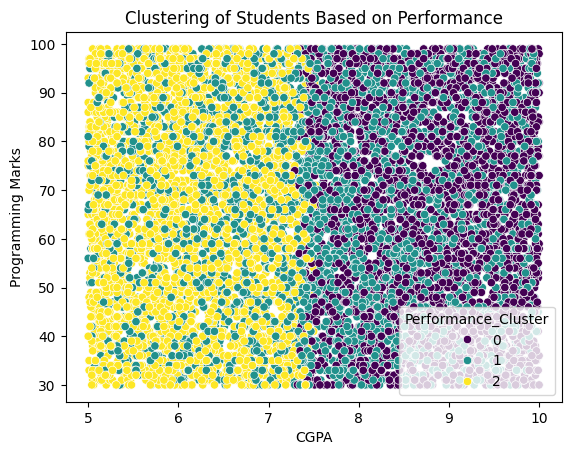

In [ ]:
data["Performance_Cluster"] = kmeans.fit_predict(scaled_features)

print("Evaluating Clustering Performance...")
print(f"Inertia: {kmeans.inertia_}")
silhouette_avg = silhouette_score(scaled_features, data["Performance_Cluster"])

print("Clustering Results:")
# Use 'data' instead of 'df' to access 'Performance_Cluster'
print(data[["Student_ID", "CGPA", "Performance_Cluster"]].head(10))

# Use 'data' instead of 'df' for the scatterplot
sns.scatterplot(x=data["CGPA"], y=data["Programming"], hue=data["Performance_Cluster"], palette="viridis")
plt.title("Clustering of Students Based on Performance")
plt.xlabel("CGPA")
plt.ylabel("Programming Marks")
plt.show()

 Display Key Insights

In [ ]:
print(f"Total Number of Students: {total_students}")
print("Student Distribution per Cluster:")
print(data["Performance_Cluster"].value_counts())

Total Number of Students: 10000
Student Distribution per Cluster:
Performance_Cluster
1    3627
2    3262
0    3111
Name: count, dtype: int64
